In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path="/content/drive/MyDrive/Admission_Predict_Ver1.1.csv"
test_path="/content/drive/MyDrive/Admission_Predict.csv"
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)
df_train = (df_train - df_train.mean()) / df_train.std()
df_test = (df_test - df_test.mean()) / df_test.std()

In [ ]:
print(df_train.head())
print(df_train.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0   -1.726861   1.817417     1.777086           0.774806  1.136222  1.097845   
1   -1.719939   0.666481    -0.031569           0.774806  0.631683  1.097845   
2   -1.713018  -0.041788    -0.524839          -0.099693 -0.377395  0.017289   
3   -1.706097   0.489414     0.461700          -0.099693  0.127144 -1.063267   
4   -1.699176  -0.218855    -0.689262          -0.974192 -1.386473 -0.522989   

       CGPA  Research  Chance of Admit   
0  1.775029  0.885518          1.404701  
1  0.485373  0.885518          0.271078  
2 -0.953088  0.885518         -0.012328  
3  0.154692  0.885518          0.554483  
4 -0.605873 -1.127023         -0.508288  
(500, 9)


In [ ]:
class LinearRegression:
    def __init__(self, design_matrix, labels, learning_rate=0.000000001, regularisation=0):

        self.learning_rate = learning_rate
        self.design_matrix = design_matrix.to_numpy()
        self.labels = labels.to_numpy().reshape(-1)
        self.weights = np.random.rand(design_matrix.shape[1])
        self.bias = 0
        self.n = len(self.design_matrix)

    def predict(self, prediction_features):

        predictions = []

        for i in prediction_features:
            predictions.append(np.dot(self.weights, i) + self.bias)

        return np.array(predictions)


    def predict_test(self, prediction_features):

        prediction_features = prediction_features.to_numpy()

        return self.predict(prediction_features)


    def train_model(self, tolerance=0.0001):
        predictions = self.predict(self.design_matrix)
        delta = np.subtract(predictions,self.labels)
        cost=np.dot(delta, delta)

        prev_cost=cost+1

        while prev_cost-cost>0:

            self.weights -= self.learning_rate*np.dot(self.design_matrix.transpose(), delta)
            self.bias -= self.learning_rate*np.sum(delta)

            predictions = self.predict(self.design_matrix)

            delta = np.subtract(predictions, self.labels)
            prev_cost=cost
            cost = np.dot(delta, delta)

        return self.weights, self.bias


    def mae(self, predictions, labels):
        return np.mean(np.absolute(predictions-labels))


In [ ]:
def mse(slope, intercept, x_train, y_train):
  pred=[]
  total_sq_error=0
  for i in range(len(x_train)):
     prediction = np.dot(x_train[i], slope) + intercept
     pred.append(prediction)
     total_sq_error += (y_train[i] - prediction) ** 2

  error=total_sq_error/float(len(x_train))
  return error, np.array(pred)

In [ ]:
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):

    for i in range(iter_val):
        int_slope = np.zeros(x_train.shape[1])
        int_intercept = 0
        n_pt = float(len(x_train))


        for j in range(len(x_train)):
            error = y_train[j] - (np.dot(x_train[j], s_slope) + s_intercept)

            int_intercept += - (2/n_pt) * error

            int_slope += - (2/n_pt) * x_train[j] * error
        s_slope = s_slope - (l_rate * int_slope)
        s_intercept = s_intercept - (l_rate * int_intercept)
    return  s_slope, s_intercept


def rsq(prediction, y_test):
    total_data = len(prediction)
    y_avg = np.sum(y_test)/total_data
    tot_err = np.sum((y_test-y_avg)**2)

    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2


In [ ]:
start_slope = np.zeros(X_train.shape[1])
df_train.columns = df_train.columns.str.strip()
df_test.columns = df_test.columns.str.strip()
X_train = df_train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR', 'CGPA', 'Research']].values
y_train = df_train['Chance of Admit'].values

X_test = df_test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y_test = df_test['Chance of Admit'].values

Slope of the model [0.17401456 0.13606685 0.05108394 0.02064315 0.11674182 0.45219812
 0.08381787]
Intercept of the model -2.1575785862787413e-15
Error value of the model 0.1975824919874141
R squared value 0.8019223137970788


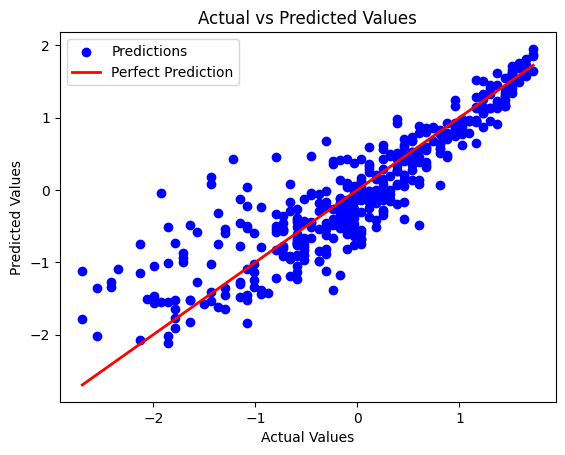

In [ ]:
learning_rate = 0.1
start_slope = np.zeros(X_train.shape[1])
start_intercept = 0
iteration = 50

grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, X_train, y_train)
final_e_value, prediction = mse(grad_slope, grad_intercept, X_test, y_test)

print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

class LinearRegression:

  def model_evaluation(self, predictions, labels):
        print(f"R squared score: {self.r2_score(predictions, labels)}")
        print(f"Mean Squared Error: {self.mse(predictions, labels)}")
        print(f"Mean Absolute Error: {self.mae(predictions, labels)}")

plt.scatter(y_test, prediction, color='blue', label='Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.legend()
plt.show()

Stochastic Gradient Descent

In [ ]:
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_loss(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def compute_gradients(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    dw = (1 / m) * np.dot(X.T, (predictions - y))
    db = (1 / m) * np.sum(predictions - y)
    return dw, db

def stochastic_gradient_descent(X, y, w, b, learning_rate, epochs, tolerance=1e-6):  #setting up a tolerance limit as the loss stops converging beyond a point
    m = len(X)
    prev_loss = float('inf')
    for epoch in range(epochs):
        for i in range(m):

            X_i = X[i:i+1]
            y_i = y[i:i+1]

            dw, db = compute_gradients(X_i, y_i, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db

        if epoch % 100 == 0:
            loss = compute_loss(X, y, w, b)

            if abs(prev_loss - loss) < tolerance:
              print(f"Converged at epoch {epoch}, Loss: {loss}")
              break
            prev_loss = loss
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, b

w = np.random.randn(1)  # Initialize weights
b = np.random.randn()   # Initialize bias

learning_rate = 0.01
epochs = 10000

# Call Stochastic Gradient Descent
w, b = stochastic_gradient_descent(X, y, w, b, learning_rate, epochs)

print(f"Final weights: {w}, Final bias: {b}")


Epoch 0, Loss: 4.300841531092107
Epoch 100, Loss: 0.13458197562378366
Epoch 200, Loss: 0.03932495491782624
Epoch 300, Loss: 0.011490781526436167
Epoch 400, Loss: 0.0033576150402255065
Epoch 500, Loss: 0.000981097650530806
Epoch 600, Loss: 0.0002866774744409923
Epoch 700, Loss: 8.376737453953418e-05
Epoch 800, Loss: 2.447689010421884e-05
Epoch 900, Loss: 7.152165774175675e-06
Epoch 1000, Loss: 2.089868240754756e-06
Epoch 1100, Loss: 6.10661078282023e-07
Converged at epoch 1200, Loss: 1.78435628264742e-07
Final weights: [2.00047593], Final bias: 2.9985386325298187


Mini-Batch Gradient Descent

In [ ]:
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_loss(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def compute_gradients(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    dw = (1 / m) * np.dot(X.T, (predictions - y))
    db = (1 / m) * np.sum(predictions - y)
    return dw, db

def mini_batch_gradient_descent(X, y, w, b, learning_rate, epochs, batch_size, tolerance=1e-6):
    m = len(X)
    prev_loss = float('inf')

    for epoch in range(epochs):

        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Iterating over mini-batches
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db

        loss = compute_loss(X, y, w, b)

        # Checking if the loss has stopped decreasing (convergence)
        if abs(prev_loss - loss) < tolerance:
            print(f"Converged at epoch {epoch}, Loss: {loss}")
            break

        prev_loss = loss

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, b


X = np.array([[1], [2], [3], [4]])
y = np.array([5, 7, 9, 11])

w = np.random.randn(1)
b = np.random.randn()

learning_rate = 0.01
epochs = 10000
batch_size = 2

w, b = mini_batch_gradient_descent(X, y, w, b, learning_rate, epochs, batch_size)

print(f"Final weights: {w}, Final bias: {b}")


Epoch 0, Loss: 45.25173801703722
Epoch 100, Loss: 0.08782543823937311
Epoch 200, Loss: 0.047969280626428475
Epoch 300, Loss: 0.026220452979587312
Epoch 400, Loss: 0.014320568949162586
Epoch 500, Loss: 0.007812618581312642
Epoch 600, Loss: 0.0042685545196992246
Epoch 700, Loss: 0.002332838776773924
Epoch 800, Loss: 0.0012733251942358664
Epoch 900, Loss: 0.0006955995491739809
Epoch 1000, Loss: 0.00038026798377330397
Epoch 1100, Loss: 0.00020765199753394373
Converged at epoch 1139, Loss: 0.00016396283976018877
Final weights: [2.01503996], Final bias: 2.9556788527623743


In [ ]:
import numpy as np
import pandas as pd

file_path="/mnt/data/Admission_Predict.csv"
df=pd.read_csv(file_path)

df=df.drop(columns=["Serial No."])
X= df.drop(columns=["Chance of Admit "]).values
y=df["Chance of Admit "].values

X_b=np.c_[np.ones((X.shape[0], 1)), X]

def w_sum(row, m):
    return np.dot(row, m)

def GradientDescentLasso(df, b, m, L, alpha, n_row, n_column):
    m_gradient=np.zeros(n_column - 1)
    b_gradient=0

    for i in range(n_row):
        row=df.iloc[i, :-1].values
        error=df.iloc[i, -1] - (w_sum(row, m) + b)

        m_gradient-=(2 / n_row) * error * row

        #L1 Regularization (Lasso)
        for j in range(len(m_gradient)):
            if m[j] > 0:
                m_gradient[j]+=alpha
            elif m[j] < 0:
                m_gradient[j]-=alpha

        b_gradient-=(2 / n_row) * error

    m-=L * m_gradient
    b-=L * b_gradient
    return m, b

n_features = df.shape[1] - 1
m=np.zeros(n_features)
b=0
L=0.00001
alpha=0.1
epochs=10

for i in range(epochs):
    m, b=GradientDescentLasso(df, b, m, L, alpha, df.shape[0], df.shape[1])
    print(f"Epoch {i+1} completed")

print("Final Weights:", m)
print("Final Bias:", b)